In [1]:
#from keras_segmentation.models.unet import vgg_unet
#model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )


from keras_segmentation.models.segnet import resnet50_segnet

model = resnet50_segnet(n_classes=50 ,  input_height=320, input_width=640)

94666752/94653016 [==============================] - 3s 0us/step


In [2]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 640, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 326, 646, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 160, 320, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 160, 320, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
import tensorflow_model_optimization as tfmot 
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule as pruning_sched

def prune_model():
    prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

    # Compute end step to finish pruning after 2 epochs.
    batch_size = 8
    epochs = 2
    validation_split = 0.1 # 10% of training set will be used for validation set. 

    num_images = 40000
    end_step = 800


    #'''
    #Defining pruning parameters

    pruning_params = {
          'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                                   final_sparsity=0.80,
                                                                   begin_step=0,
                                                                   end_step=1000)
    }

    #'''

    model_copy = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)
    return model_copy


In [ ]:
pruned_model = prune_model()

In [ ]:
----

In [ ]:
import tensorflow
import tensorflow_model_optimization as tfmot 
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule as pruning_sched


In [ ]:
def apply_pruning_to_conv2d(layer):
    if isinstance(layer, tf.keras.layers.Conv2D):
        return tfmot.sparsity.keras.prune_low_magnitude(layer,
                                                        pruning_schedule=pruning_sched.ConstantSparsity(0.5, 0))
    return layer

model_for_pruning = tensorflow.keras.models.clone_model(
    model,
    clone_function=apply_pruning_to_conv2d,
)

In [ ]:
model_for_pruning().train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=1
)

In [ ]:
----

In [5]:
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=1
)

Verifying training dataset


100%|██████████| 367/367 [00:09<00:00, 36.83it/s]


Dataset verified! 
512/512 [==============================] - 34s 60ms/step - loss: 0.6087 - accuracy: 0.8261

Epoch 00001: saving model to /tmp/vgg_unet_1.00001


In [ ]:
train_images,
train_annotations,
input_height=None,
input_width=None,
n_classes=None,
verify_dataset=True,
checkpoints_path=None,
epochs=5,
batch_size=2,
validate=False,
val_images=None,
val_annotations=None,
val_batch_size=2
auto_resume_checkpoint=False
load_weights=None
steps_per_epoch=512
val_steps_per_epoch=512
gen_use_multiprocessing=False
ignore_zero_class=False
optimizer_name='adam'
do_augment=False
augmentation_name="aug_all",
callbacks=None
custom_augmentation=None
other_inputs_paths=None
preprocessing=None
read_image_type=1

In [6]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

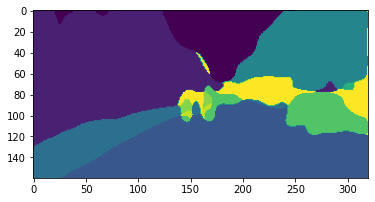

In [7]:
import matplotlib.pyplot as plt
plt.imshow(out)

In [8]:
print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

101it [00:13,  7.28it/s]

{'frequency_weighted_IU': 0.7719882194648939, 'mean_IU': 0.10330460270184365, 'class_wise_IU': array([0.91329795, 0.7637741 , 0.        , 0.92703426, 0.77794914,
       0.83645368, 0.02511116, 0.07206103, 0.55092786, 0.05439423,
       0.11816858, 0.12605815, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])}


In [9]:
train_images="dataset1/images_prepped_train/"
train_annotations="dataset1/annotations_prepped_train/"
#input_height=None
#input_width=None
#n_classes=None
verify_dataset=True
checkpoints_path=None
epochs=20
batch_size=2
validate=False
val_images=None
val_annotations=None
val_batch_size=2
auto_resume_checkpoint=False
load_weights=None
steps_per_epoch=512
val_steps_per_epoch=512
gen_use_multiprocessing=False
ignore_zero_class=False
optimizer_name='adam'
do_augment=False
augmentation_name="aug_all",
callbacks=None
custom_augmentation=None
other_inputs_paths=None
preprocessing=None
read_image_type=1

In [19]:
n_classes = model.n_classes
input_height = model.input_height
input_width = model.input_width
output_height = model.output_height
output_width = model.output_width

In [20]:
train_gen = image_segmentation_generator(
        train_images, train_annotations,  batch_size,  n_classes,
        input_height, input_width, output_height, output_width,
        do_augment=do_augment, augmentation_name=augmentation_name,
        custom_augmentation=custom_augmentation, other_inputs_paths=other_inputs_paths,
        preprocessing=preprocessing, read_image_type=read_image_type)

In [14]:
from keras_segmentation.models.all_models import model_from_name
import six
from keras_segmentation.data_utils.data_loader import image_segmentation_generator, \
    verify_segmentation_dataset
from keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
import tensorflow_model_optimization as tfmot 
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule as pruning_sched
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
import numpy as np

In [12]:
num_images = 367
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

#'''

model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

/home/mohan/virtualenv/divamgupta_tf2/lib/python3.6/site-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [15]:
p_checkpoints_path = 'divam_ss_pruned_weights_n'
p_checkpoint = ModelCheckpoint(filepath=p_checkpoints_path + "{epoch:02d}.h5",save_weights_only=True,save_best_only=True,
                               monitor='val_loss',
                              verbose=True)

In [16]:
log_dir = './pruning_logs'
p_callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    # Log sparsity and other metrics in Tensorboard.
    tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),p_checkpoint]

In [17]:
loss_k = 'categorical_crossentropy'

model_for_pruning.compile(loss=loss_k,
                      optimizer='adam',
                      metrics=['accuracy'])

In [21]:
initial_epoch=0
model_for_pruning.fit(train_gen, steps_per_epoch=steps_per_epoch,
                  epochs=epochs, callbacks=p_callbacks, initial_epoch=initial_epoch)

/home/mohan/virtualenv/divamgupta_tf2/lib/python3.6/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/20
140/512 [=======>......................] - ETA: 32s - loss: 0.4664 - accuracy: 0.8608

KeyboardInterrupt: 